### REGRESSION MODELS FOR PROPERTIES IN BROOKLYN

Statistical analysis is an essential part of analysis, exploratory analysis uncover insights and can easy to visualize, however statistical analysis comes in to play while investigating the relationship between dependent and independent variables and can go beyond that to give statistical meaning and evidence to our findings. Having a knowledge of the relationships that exist between variables can solve many business problems, this is why regression analysis will be carried out on the properties in Brooklyn to see if some features are the reason why properties are cheap or expensive.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
properties = pd.read_csv("full_sale.csv")

In [5]:
properties.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_number,month_name,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,10,October,Northwestern Brooklyn,7


####  SETTING A PRICE THRESHOLD OF OVER 100,000 USD

In [6]:
properties = properties.loc[properties["sale_price"] > 100000]

In [7]:
properties.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_number,month_name,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,10,October,Northwestern Brooklyn,7


In [8]:
df = properties[["sale_price", "mins_to_manhattan_bridge"]]

In [9]:
#Adding constant to our dataframe
properties = sm.add_constant(properties)

Now we have our constant included, then we can use our statsmodel to carry out a multivariate regression to see if some features impacts the price of this properties.

In [10]:
properties_y = properties['sale_price']
properties_x = properties[['const', 'year_of_sale', 'land_sqft', 'gross_sqft', 'mins_to_manhattan_bridge', 'tax_class_at_sale']]
properties_ols = sm.OLS(properties_y, properties_x).fit()
properties_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                 1.018e+04
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:41:58   Log-Likelihood:            -3.7954e+06
No. Observations:              233805   AIC:                         7.591e+06
Df Residuals:                  233799   BIC:                         7.591e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -1.09e+08   2.51e+06    -43.455      0.000   -1.14e+08   -1.04e+08
year_of_sale               5.45e+04   1247.790     43.680      0.000    5.21e+04    5.69e+04
land_sqft                   25.5136      0.607     42.003      0.000      24.323      26.704
gross_sqft                  76.1814      0.476    159.993      0.000      75.248      77.115
mins_to_manhattan_bridge -2.365e+04    704.564    -33.567      0.000    -2.5e+04   -2.23e+04
tax_class_at_sale         3.377e+05   7907.351     42.702      0.000    3.22e+05    3.53e+05
==============================================================================
Omnibus:                   792485.007   Durbin-Watson:                   0.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     586274751643.342
Skew:                          61.494   Prob(JB):                         0.00
Kurtosis:                    7759.660   Cond. No.                     6.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
properties.head()

,const,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_number,month_name,geographical_region,mins_to_manhattan_bridge
0,1.0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,4,April,Northwestern Brooklyn,3
1,1.0,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,12,December,Northwestern Brooklyn,4
2,1.0,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,8,August,Northwestern Brooklyn,7
3,1.0,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,11,November,Southern Brooklyn,33
4,1.0,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,10,October,Northwestern Brooklyn,7


#### CREATING A REGRESSION TO SEE THE IMPACT OF YEARS ON MEDIAN SALE PRICE OF PRROPERTIES IN BROOKLYN
We are going to deploy two libraries to build a regression model between the dependent variable(sale_price) and independent variable(year_of_sale).
- Using the Scikit learn package to fit our model and to see the value of R-Squared score.
- Using the statsmodel to fit our model and also get the statistical summary of our model which is important.

In [12]:
#grouping by the year and getting the median sale price for each year
year_price = properties.groupby("year_of_sale")["sale_price"].median().reset_index().rename(columns=({"sale_price":
                                                                                                      "median_sale_price"}))

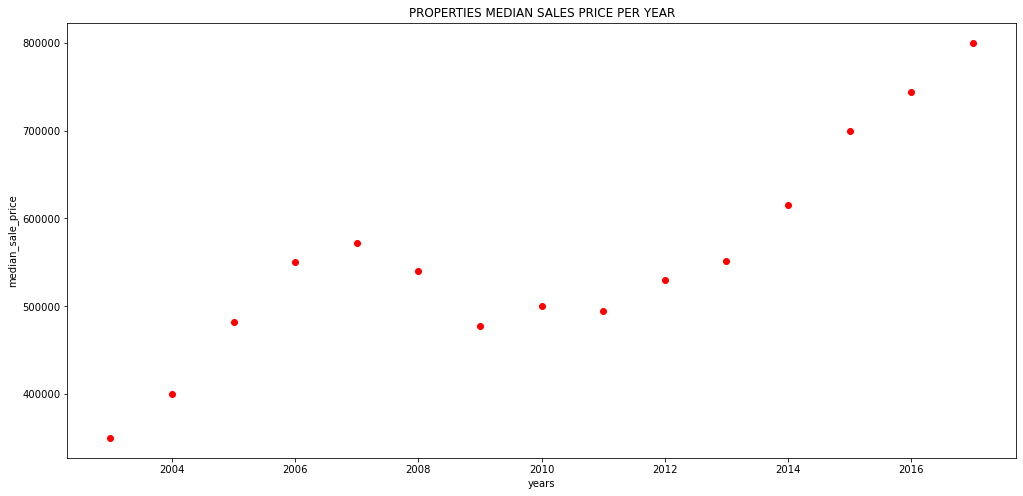

In [13]:
plt.figure(figsize=(17, 8))
plt.ticklabel_format(axis="y", style="plain")
plt.scatter(year_price["year_of_sale"], year_price["median_sale_price"], color = "red")
plt.xlabel("years")
plt.ylabel("median_sale_price")
plt.title("PROPERTIES MEDIAN SALES PRICE PER YEAR")
plt.show()

#### USING THE SCIKIT LEARN PACKAGE

In [14]:
x = year_price[["year_of_sale"]]
y = year_price[["median_sale_price"]]

In [15]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [16]:
# R-Squared value
regressor.score(x, y)

0.7339522650611809

In [17]:
# value of y-intercept and the coefficient.
regressor.coef_, regressor.intercept_

(array([[23197.95]]), array([-46073997.03333332]))

Text(0, 0.5, 'median_sale_price')

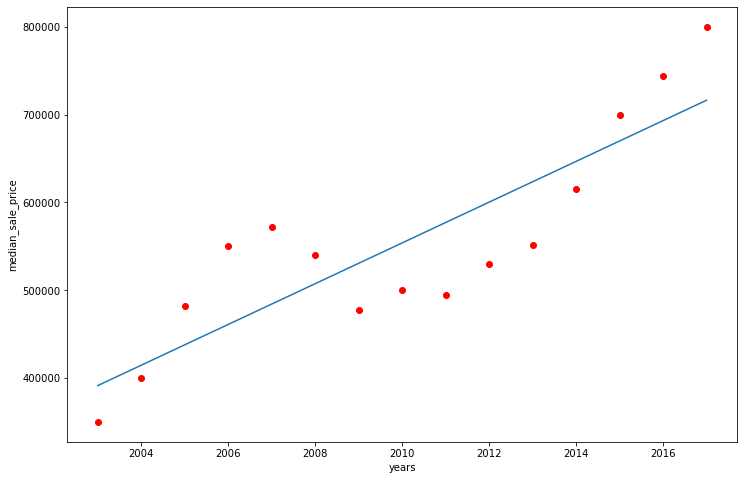

In [18]:
# Fitting of best fit line(regression line)
plt.figure(figsize=(12, 8))
plt.ticklabel_format(axis="y", style="plain")
plt.scatter(year_price["year_of_sale"], year_price["median_sale_price"], color ="red")
plt.plot(year_price["year_of_sale"], regressor.predict(x))
plt.xlabel("years")
plt.ylabel("median_sale_price")

The regression plot above visualize a consistent upward trend except after 2007 which was as a result of a the Great recession and we can see the increase was again consistent after 2009.
#### USING THE STATSMODEL

In [20]:
# Creating the constant column
year_price = sm.add_constant(year_price)

In [21]:
# Fitting our OLS model
year_price_y = year_price["median_sale_price"]
year_price_x = year_price[['const', 'year_of_sale']]
year_price_ols = sm.OLS(year_price_y, year_price_x).fit()
year_price_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      median_sale_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     35.86
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           4.53e-05
Time:                        12:27:31   Log-Likelihood:                -186.40
No. Observations:                  15   AIC:                             376.8
Df Residuals:                      13   BIC:                             378.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.607e+07   7.79e+06     -5.917      0.000   -6.29e+07   -2.93e+07
year_of_sale   2.32e+04   3873.681      5.989      0.000    1.48e+04    3.16e+04
==============================================================================
Omnibus:                        5.047   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                1.456
Skew:                           0.173   Prob(JB):                        0.483
Kurtosis:                       1.514   Cond. No.                     9.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistical summary above shows the same R-Squared as using the scikit learn and with R-Squared of 0.734, it shows a strong model and this interprets that 73% of the median prices of properties in Brooklyn is impacted as the year increases, this model score would have been more than 0.734 if not for the recession that hit the real estate market.
##### CHECKING CORRELATION BETWEEN THE DISTANCE TO MANHATTAN BRIDGE AND THE MEDIAN SALES PRICE
It's surprising how none of the features we used in our multivariate regression earlier is not impacting the sale price. We have decided to groupby the minutes to mahattan bridge and the average sale price and check patterns in this and build a regression model on this to check.

In [22]:
mins_sale = properties.groupby("mins_to_manhattan_bridge")["sale_price"].mean().round(0).reset_index().rename(columns=({"sale_price":
                                                                                                                        "average_sale_price"}))

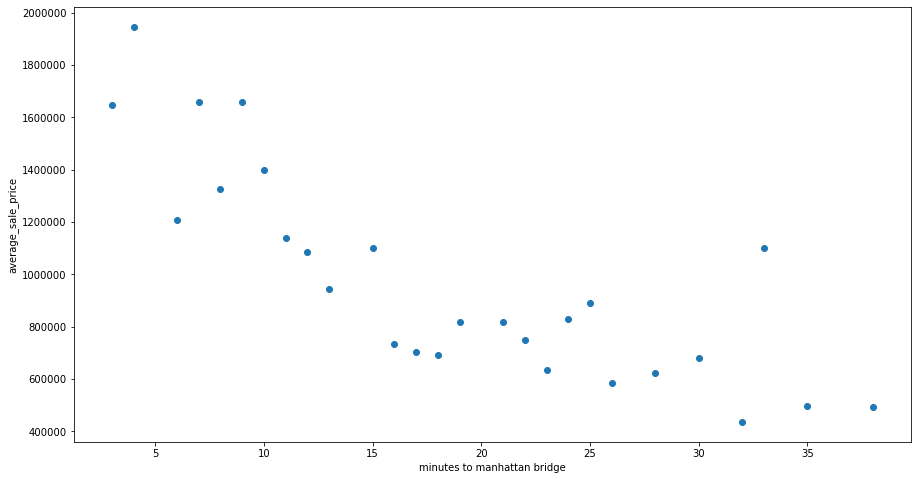

In [23]:
# visualizing the trend between the mins_to_manhattan_bridge and the average_price
plt.figure(figsize=(15, 8))
plt.scatter(mins_sale.mins_to_manhattan_bridge, mins_sale.average_sale_price)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel("minutes to manhattan bridge")
plt.ylabel("average_sale_price")
plt.show()

Looking at the scatter plot above, we can see that there is a downward trend in the pattern which highlights that the farther away from manhattan bridge the lesser the average sale price of properties in those neighborhood, however there is one of the data point above that is 33 minutes away and it seems expensive, this makes us curious if this represents the other data point, we needs to investigate this neigbborhood before removing this point.

In [24]:
properties.loc[properties.mins_to_manhattan_bridge == 33]["neighborhood"].unique()

array(['MILL BASIN'], dtype=object)

The neighborhood in question is MILL BASIN. This neighborhood is a boaters and sun lovers neighborhood which ceratinly makes it different from the other neighborhood that are far from manhattan bridge, this is an expensive neighborhood with lot of waterfront homes, homes surrounded by beach which can be seen on https://www.youtube.com/watch?v=5gu7hMZm_4Q. We can see this neighborhood is an exception and it certainly does not reflect other data point, so it's reasonable to remove this data point so as to strengthen our model.

In [25]:
mins_sale.drop(index=[24], inplace = True)

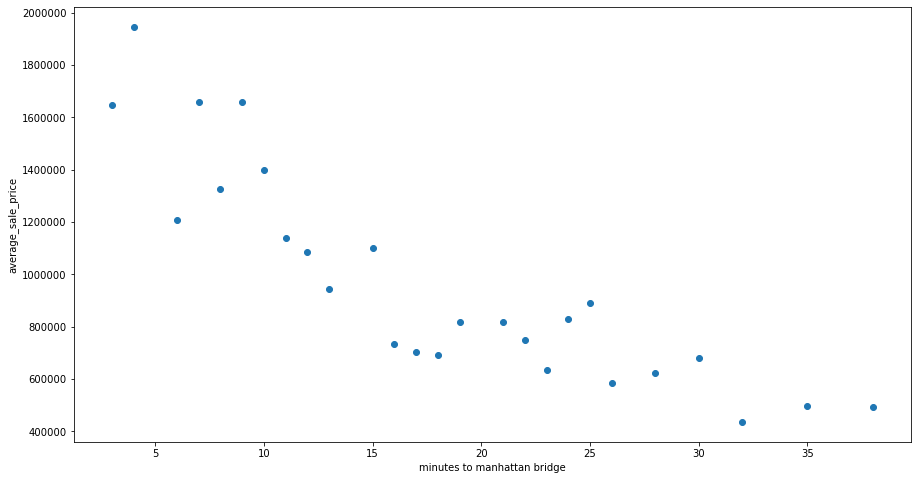

In [26]:
plt.figure(figsize=(15, 8))
plt.scatter(mins_sale.mins_to_manhattan_bridge, mins_sale.average_sale_price)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel("minutes to manhattan bridge")
plt.ylabel("average_sale_price")
plt.show()

In [27]:
X = mins_sale[["mins_to_manhattan_bridge"]]
Y = mins_sale[["average_sale_price"]]

In [28]:
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

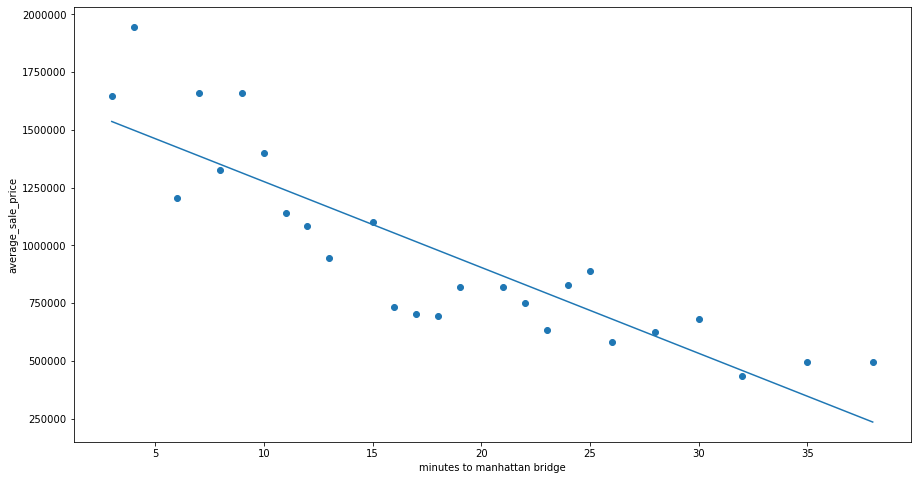

In [29]:
plt.figure(figsize=(15, 8))
plt.scatter(mins_sale.mins_to_manhattan_bridge, mins_sale.average_sale_price)
plt.plot(mins_sale.mins_to_manhattan_bridge, regressor.predict(mins_sale[["mins_to_manhattan_bridge"]]))
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel("minutes to manhattan bridge")
plt.ylabel("average_sale_price")
plt.show()

In [30]:
regressor.score(X,Y)

0.7620357229236601

In [31]:
regressor.intercept_, regressor.coef_

(array([1647320.71236767]), array([[-37157.71085076]]))

With an R-Squared of our model being 0.76, we can say that 76% of the average sale price of the neighborhoods can be explained by the minutes to manhattan bridge.